# Comparing recal_speed and original speed

In [1]:
import os
import glob
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from libraries.utils import read_gps_file
from libraries.recal_speed import reCalculateSpeed

In [2]:
# base folder: For e.g.: 'BusTrails'
base_folder_address = "./Bus_Trails"
up_folder = r'\up'
down_folder = r'\down'

folder_pattern = "\**\DATA*" # ''\**\' is for recursive folders
directories = glob.glob(base_folder_address+folder_pattern)

#Copying

In [3]:
original_speed=[]
recal_speed=[]
for directory in tqdm(directories):
    gps = glob.glob(directory+os.path.sep+'**\*GPS*')[0]
    
    original_gps_file=read_gps_file(gps)
    recal_gps_file = reCalculateSpeed(original_gps_file.copy())
    original_speed.append(original_gps_file[['speed']])
    recal_speed.append(recal_gps_file[['speed']])

100%|████████████████████████████████████████████████████████████████████████████████| 102/102 [03:08<00:00,  1.85s/it]


In [8]:
df_original_speed=pd.concat(original_speed)
df_recal_speed=pd.concat(recal_speed)

#Saving....
df_original_speed.to_csv("./speed_cal/original_speed.csv",index=False)
df_recal_speed.to_csv("./speed_cal/recal_speed.csv",index=False)

# Comparing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt

In [2]:
df_original_speed=pd.read_csv("./speed_cal/original_speed.csv")
df_recal_speed=pd.read_csv("./speed_cal/recal_speed.csv")

In [3]:
# df_original_speed.speed.hist(bins=20)
# df_recal_speed.speed.hist(bins=20,alpha=0.3)

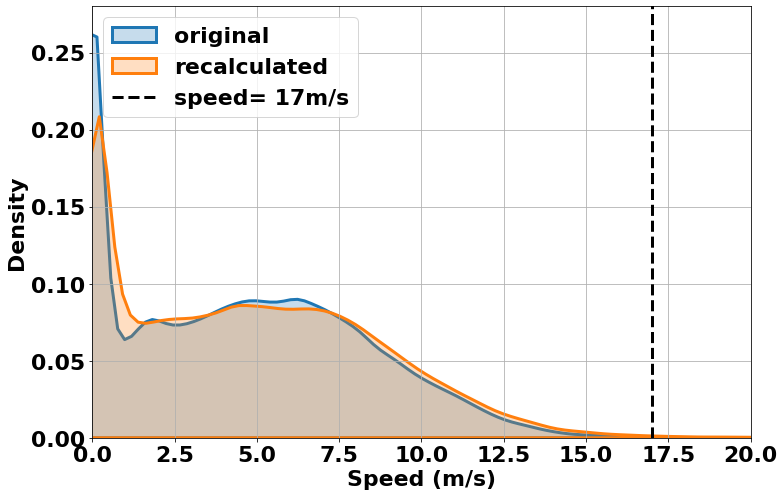

In [4]:
fig, ax = plt.subplots(figsize=(11,7))

sns.kdeplot(data=df_original_speed, x="speed",label='original',ax=ax,shade=True,linewidth=3)
sns.kdeplot(data=df_recal_speed, x="speed",label='recalculated',ax=ax,shade=True,linewidth=3)
plt.vlines(x=17,ymin=0,ymax=0.3,colors='black',linestyles='dashed', linewidth=3,label='speed= 17m/s')
plt.xlim(0,20)
plt.ylim(0,0.28)

ax.set_xlabel("Speed (m/s)",fontsize=22, fontweight='bold')
ax.set_ylabel("Density",fontsize=22, fontweight='bold')

plt.xticks(fontsize=22, fontweight='bold')
plt.yticks(fontsize=22, fontweight='bold')
plt.legend(loc='upper left',prop={'size':22,'weight':'bold'})
plt.tight_layout()
plt.grid()
# plt.close()
fig.savefig("./speed_cal/speed_dist_compare.png")

# CDF at point 3m/s

(0.0, 20.0)

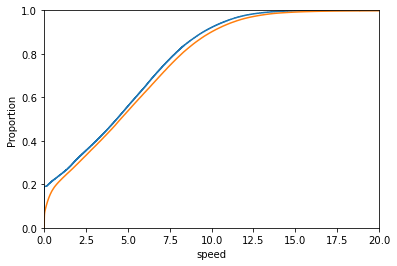

In [5]:
fig=plt.figure()
ax=fig.add_subplot(111)
sns.ecdfplot(data=df_original_speed, x="speed",ax=ax)
sns.ecdfplot(data=df_recal_speed, x="speed",ax=ax)
plt.xlim(0,20)

In [7]:
def get_cdf(ax,line_no,point):
    x,y=ax.lines[line_no].get_data()
    return y[list(np.round(x,5)-point).index(np.abs(np.round(x,5)-point).min())]

In [8]:
get_cdf(ax,0,3)

0.3915978473621196

In [9]:
get_cdf(ax,1,3)

0.37219110378912684

In [10]:
#NICE